# Option pricing with MC Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyfeng as pf
import scipy.stats as spst

In [2]:
sigma = 0.2
texp = 1
spot = 100
m_bs = pf.Bsm(sigma)

In [3]:
# Generate random numbers
z = np.random.normal(size=100000)
#anti-thetic

In [4]:
np.mean(z), np.std(z)

(0.005954435375121565, 0.9986169827999446)

In [7]:
z.shape

(100000,)

## Black-Scholes model (Geomegric Brownian Motion)

In [8]:
# Black-Scholes-Merton model (Geometric BM)
s_bsm = spot * np.exp(sigma*np.sqrt(texp)*z - sigma**2*texp/2)
print(s_bsm)

[ 94.94416121  76.83668336 119.70906119 ...  80.98546144 138.26623659
  82.95924837]


In [9]:
## Sanity check
np.mean(s_bsm), np.std(s_bsm)
#spst.describe(s_bsm)

(100.11421159295739, 20.208898683862834)

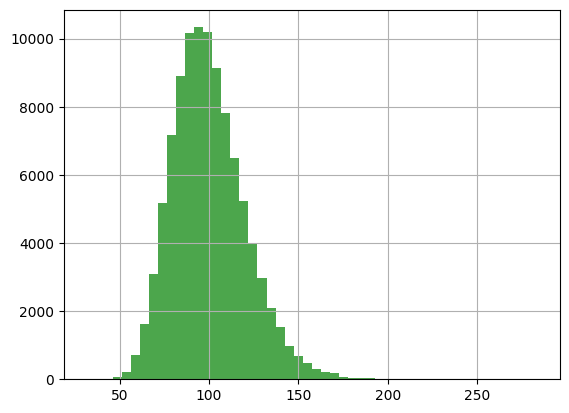

In [10]:
# the histogram of the data
n, bins, patches = plt.hist(s_bsm, 50, facecolor='green', alpha=0.7)
plt.grid(True)
plt.show()

In [11]:
### Price a call option

strike = 110
#cp_sign = 1
price = np.mean(np.fmax(s_bsm - strike, 0))
print( price )

4.326010639597787


In [12]:
# Exact BSM price
m_bs.price(strike, spot, texp)

4.292010941409885

In [13]:
### Can price different options without extra computation

strike = 98
cp = -1
price = np.mean(np.fmax(cp*(s_bsm - strike), 0))
print( price )

6.867555922388431


In [14]:
# Exact price
m_bs.price(strike, spot, texp, cp=-1)

6.925974960378305

## Bachelier Model (Arithmetic Brownian Motion)

In [12]:
sigma = 20
texp = 1
spot = 100
m_norm = pf.Norm(sigma)

In [13]:
s_norm = spot + sigma * np.sqrt(texp) * z
s_norm.shape

(100000,)

In [14]:
strike = 102
cp_sign = 1
price = np.mean(np.fmax(s_norm - strike, 0))
print( price )

7.029318044708391


In [15]:
# Exact price
m_norm.price(strike, spot, texp)

7.018706624094294

In [16]:
strike = 98
cp = -1
price = np.mean(np.fmax(cp*(s_norm - strike), 0))
print( price )

7.039141746655447


In [17]:
# Exact price
m_norm.price(strike, spot, texp, cp=-1)

7.018706624094294